In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_auc_score, roc_curve

In [2]:
help(load_breast_cancer)

Help on function load_breast_cancer in module sklearn.datasets._base:

load_breast_cancer(*, return_X_y=False, as_frame=False)
    Load and return the breast cancer wisconsin dataset (classification).
    
    The breast cancer dataset is a classic and very easy binary classification
    dataset.
    
    =================   ==============
    Classes                          2
    Samples per class    212(M),357(B)
    Samples total                  569
    Dimensionality                  30
    Features            real, positive
    =================   ==============
    
    Read more in the :ref:`User Guide <breast_cancer_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    as_frame : bool, default=False
        If True, the data is a pandas DataFrame including c

In [3]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df["benign"] = breast_cancer.target

In [4]:
df.shape

(569, 31)

In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign'],
      dtype='object')

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [9]:
df.benign.value_counts()

1    357
0    212
Name: benign, dtype: int64

In [10]:
majority_df = df[df["benign"] == 1]
minority_df = df[df["benign"] == 0]
minority_downsampled_df = resample(minority_df, replace=True, n_samples=30, random_state=42)
downsampled_df = pd.concat([majority_df, minority_downsampled_df])

In [11]:
downsampled_df.shape

(387, 31)

In [12]:
downsampled_df.benign.value_counts()

1    357
0     30
Name: benign, dtype: int64

In [13]:
minority_downsampled_df.shape

(30, 31)

In [14]:
majority_df.shape

(357, 31)

In [15]:
y = downsampled_df["benign"]
X = downsampled_df.drop("benign", axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=42)

#### Important Note: The data is labeled. Usually for anomaly detecction, the data is unlabeled, requiring semi-supervised or unsupervised model. Isolation Forest, DBSCAN are unsupervised algorithms. Their effectiveness can be measured using Silhoutte Score or Davies- Bouldin Index or Calinski-Harabasz Index (Not confusion matrix or ROC curve etc.)

#### Isolation Forest

In [17]:
model_isoforest = IsolationForest(random_state=42)

In [18]:
model_isoforest.fit(X_train, y_train)

IsolationForest(random_state=42)

In [19]:
y_pred = model_isoforest.predict(X_test)

In [20]:
y_pred[y_pred == -1] = 0

In [21]:
confusion_matrix(y_test, y_pred)

array([[ 7,  2],
       [ 5, 83]], dtype=int64)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.98      0.94      0.96        88

    accuracy                           0.93        97
   macro avg       0.78      0.86      0.81        97
weighted avg       0.94      0.93      0.93        97



#### DBSCAN

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 

#### Plotting k-distance graph to select optimal epsilon based on min_samples(k). In this case, using Elbow method, k can be chosen as 50.

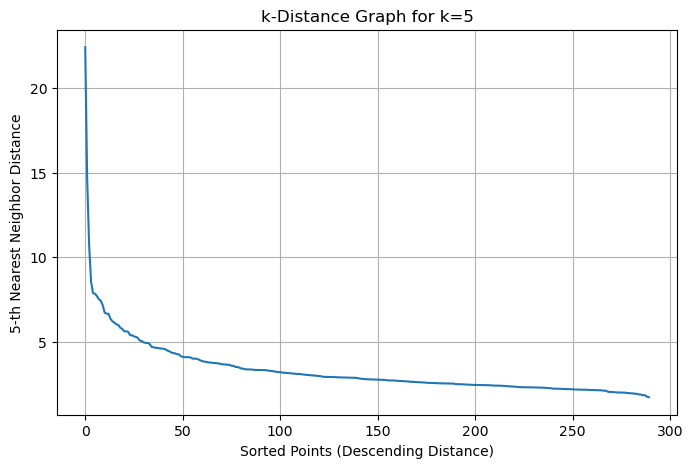

In [24]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Step 3: Choose k (usually k = min_samples)
k = 5

# Step 4: Compute k-distance using NearestNeighbors
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_train_scaled)
distances, indices = nbrs.kneighbors(X_train_scaled)

# Step 5: Sort distances (k-th distance for each point)
k_distances = distances[:, k-1]  # k-th nearest neighbor distance (k-1 because of zero-indexing)
k_distances = np.sort(k_distances)[::-1]  # Sort in descending order

# Step 6: Plot the k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.xlabel('Sorted Points (Descending Distance)')
plt.title(f'k-Distance Graph for k={k}')
plt.grid(True)
plt.show()

In [25]:
# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=50, min_samples=5)  # Adjust parameters based on your data
dbscan.fit(X_train_scaled)

# Step 3: Get labels and evaluate
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Estimated number of clusters: {n_clusters}')
print(f'Noise points: {list(labels).count(-1)}')

Estimated number of clusters: 1
Noise points: 0


In [26]:
# Silhouette Score
if n_clusters > 1:
    score = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score: {score}')